In [4]:
import pandas as pd
import numpy as np

#load data
orig_data = pd.read_pickle("./unprocessed.bz2")
#keep only 2 columns
# small_data = orig_data[['gender_orientation',"q12719","q9688"]].copy()
# small_data = small_data.replace(np.nan, 'Nan', regex=True)
question_headers = []
non_question_headers = []
for h in list(orig_data):
    if h[0] == 'q':
        question_headers.append(h)
    elif h[0] != 'p':
        non_question_headers.append(h)
print '\',\''.join(non_question_headers)

print 'Number of questions', len(question_headers)

d_astrology_seriosity','d_education_phase','d_gender','d_income','d_religion_type','d_drugs','lf_want','d_smokes','d_astrology_sign','d_country','d_drinks','d_age','d_ethnicity','d_offspring_current','d_bodytype','lf_max_age','lf_for','d_job','d_orientation','d_languages','d_relationship','d_offspring_desires','lf_location','lf_min_age','d_education_type','lf_single','d_religion_seriosity','CA','gender_orientation','gender','race','gender2','gender2_num','CA_items
Number of questions 2541


In [54]:
question_data = orig_data[question_headers]
# print question_data.count
question_data.isnull().mean().mean()

0.7764702925782638

In [36]:
for title in list(orig_data):
    vc = orig_data[title].value_counts()
    total = vc.sum()
    if total > 54000 :
        print vc, '\n', total,'\n\n'

Not at all important    25227
Not very important      12456
Somewhat important      11504
Extremely important      4953
Name: q41, dtype: int64 
54140 


No     37750
Yes    16693
Name: q325, dtype: int64 
54443 


No     38161
Yes    18962
Name: q501, dtype: int64 
57123 


Both       23133
Dogs       19883
Cats        7674
Neither     4056
Name: q997, dtype: int64 
54746 


Yes, but only soft stuff like marijuana    26443
No                                         22062
Yes                                         7192
Name: q9688, dtype: int64 
55697 


Totally willing!                            46226
Hesitant, but I'd certainly consider it.    11640
I'm not interested in meeting in person.      177
Name: q16053, dtype: int64 
58043 


Never - Get a job                 37271
It's okay, if it is not abused    18029
No problem                         9395
Okay for short amounts of time     3676
Name: q34113, dtype: int64 
68371 


Yes    34020
No     20944
Name: q44639, dtype: int64 


27.0     3861
29.0     3793
26.0     3742
30.0     3688
28.0     3621
25.0     3495
31.0     3389
24.0     3354
32.0     3212
34.0     3010
33.0     2989
35.0     2703
36.0     2262
23.0     2222
37.0     2009
22.0     1826
38.0     1710
39.0     1512
40.0     1401
21.0     1373
41.0     1166
42.0     1081
20.0     1060
44.0      961
43.0      937
19.0      841
45.0      840
46.0      607
18.0      596
47.0      470
         ... 
58.0       52
60.0       41
61.0       30
62.0       20
63.0       19
64.0       17
65.0       13
67.0       13
68.0       10
66.0        7
69.0        5
70.0        5
71.0        4
98.0        3
91.0        3
74.0        2
94.0        2
95.0        2
75.0        2
72.0        2
100.0       2
86.0        1
76.0        1
84.0        1
99.0        1
81.0        1
77.0        1
97.0        1
90.0        1
78.0        1
Name: d_age, Length: 71, dtype: int64 
66365 


White                                                                                             

The best?  Maybe...    57236
Absolutely.             6428
No way.                 4707
Name: q20062, dtype: int64 
68371 


-0.052395    1352
 0.702989    1247
-1.586541    1202
-0.802111    1021
 0.189604    1000
-0.786778     698
-1.736796     612
-0.041197     569
-1.289137     524
-0.395067     519
 1.964930     489
-0.665651     474
-0.598015     452
-0.969928     407
-0.271835     407
 0.763080     406
-0.638505     363
 1.223592     340
-2.110129     339
-1.139603     331
 0.835388     325
 0.684201     306
-0.257632     287
 1.795776     275
 0.618663     268
-0.018510     266
-0.116749     261
 0.364598     258
 1.266567     251
 0.741622     248
             ... 
 0.433231       1
-0.409076       1
 0.767324       1
 1.029757       1
-1.267320       1
 0.228813       1
-1.130805       1
 1.346609       1
 0.516301       1
 0.122289       1
 0.826894       1
-0.375724       1
-1.230064       1
-2.185322       1
-0.865408       1
 0.361056       1
-1.005974       1
-0.501752   

I have no tattoos                  25807
I have 1 or more LITTLE tattoos     8379
I have 1 or more BIG tattoos        6264
Name: q128, dtype: int64


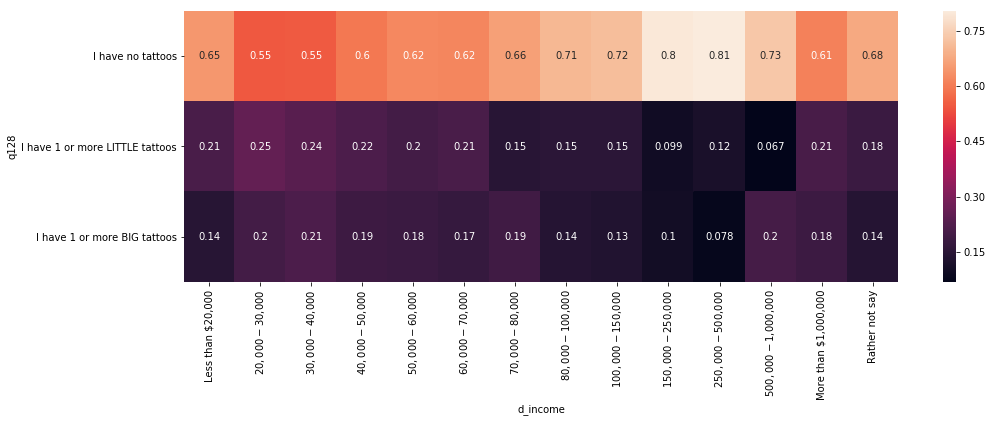

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_feat_crosstab(q_rows,q_colum,column_order=None,row_order=None,annot=True):
    no_na_data = orig_data.dropna(subset=[q_rows])
    cross_data = pd.crosstab(index = no_na_data[q_rows],columns= no_na_data[q_colum])
    if column_order:
        cross_data = cross_data.reindex(column_order, axis=1)
    if row_order:
        cross_data = cross_data.reindex(row_order, axis=0)
    #normalize by column
    norm_cross_data = cross_data.apply(lambda x: x/x.sum(), axis=0)
    norm_cross_data
    sns.heatmap(norm_cross_data, annot=annot)

#plot tattoos to income q128 / 'd_income'
print orig_data[q_rows].value_counts()
plt.figure(figsize = (16,5))
column_order = ['Less than $20,000','$20,000-$30,000','$30,000-$40,000','$40,000-$50,000','$50,000-$60,000','$60,000-$70,000','$70,000-$80,000','$80,000-$100,000','$100,000-$150,000','$150,000-$250,000','$250,000-$500,000','$500,000-$1,000,000','More than $1,000,000','Rather not say']
row_order = ['I have no tattoos','I have 1 or more LITTLE tattoos','I have 1 or more BIG tattoos']
plot_feat_crosstab('q128','d_income',column_order,row_order)


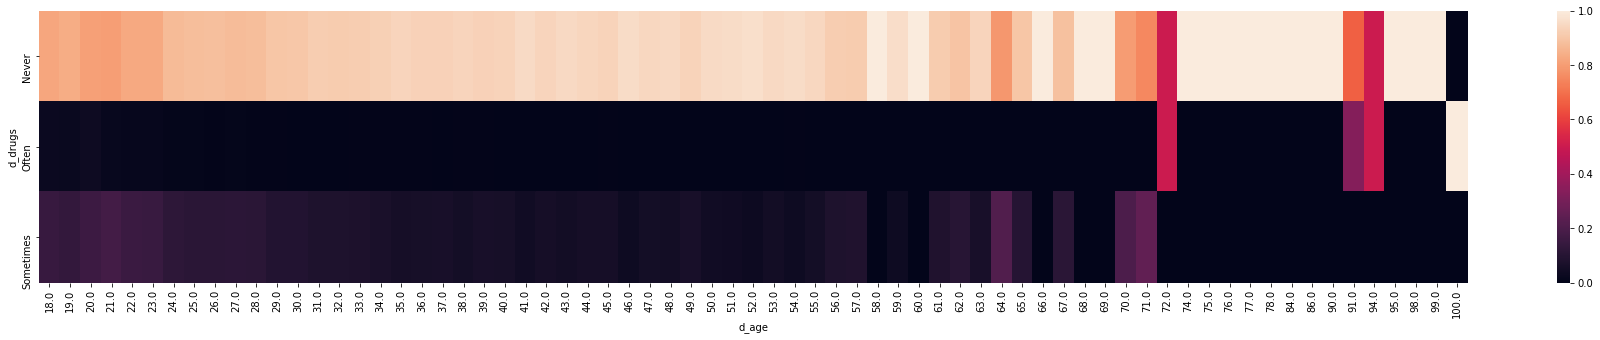

In [46]:
#Drugs to age d_drugs / d_age -> drug usage peaks at 21 and then diminishes
plt.figure(figsize = (32,5))
plot_feat_crosstab('d_drugs','d_age',None,None,annot=False)
